## Week 03 - Classification

By Jorge Abrego

### Getting the dataset

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv -P ./data

--2023-10-01 02:36:57--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: './data/data.csv'

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.009s  

2023-10-01 02:36:58 (156 MB/s) - './data/data.csv' saved [1475504/1475504]



### Loading libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

### Data Preparation

In [3]:
selected_cols = ['Make', 'Model', 'Year', 'Engine HP', 
                 'Engine Cylinders', 'Transmission Type', 
                 'Vehicle Style', 'highway MPG', 'MSRP']
data = pd.read_csv('data/data.csv', usecols=selected_cols)

In [4]:
data.columns = data.columns.str.replace(' ', '_').str.lower()

In [5]:
data.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,34500


In [6]:
data.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
msrp                  0
dtype: int64

In [7]:
data.fillna(0, inplace=True)

In [8]:
data.rename(columns={"msrp":"price"}, inplace=True)

In [9]:
data.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,34500


### Question 1

What is the most frequent observation (mode) for the column `transmission_type`?

In [10]:
data['transmission_type'].describe()

count         11914
unique            5
top       AUTOMATIC
freq           8266
Name: transmission_type, dtype: object

In [11]:
data['transmission_type'].mode()

0    AUTOMATIC
Name: transmission_type, dtype: object

### Question 2

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

In [12]:
data_numeric = data[data.select_dtypes(include=np.number).columns].copy()
data_numeric.describe()

,year,engine_hp,engine_cylinders,highway_mpg,price
count,11914.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,247.941749,5.614655,26.637485,4.059474e+04
std,7.579740,110.507669,1.800554,8.863001,6.010910e+04
min,1990.000000,0.000000,0.000000,12.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,22.000000,2.100000e+04
50%,2015.000000,225.000000,6.000000,26.000000,2.999500e+04
75%,2016.000000,300.000000,6.000000,30.000000,4.223125e+04
max,2017.000000,1001.000000,16.000000,354.000000,2.065902e+06


In [13]:
data_numeric.corr()

,year,engine_hp,engine_cylinders,highway_mpg,price
year,1.000000,0.338714,-0.040708,0.258240,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,-0.160043
price,0.227590,0.650095,0.526274,-0.160043,1.000000


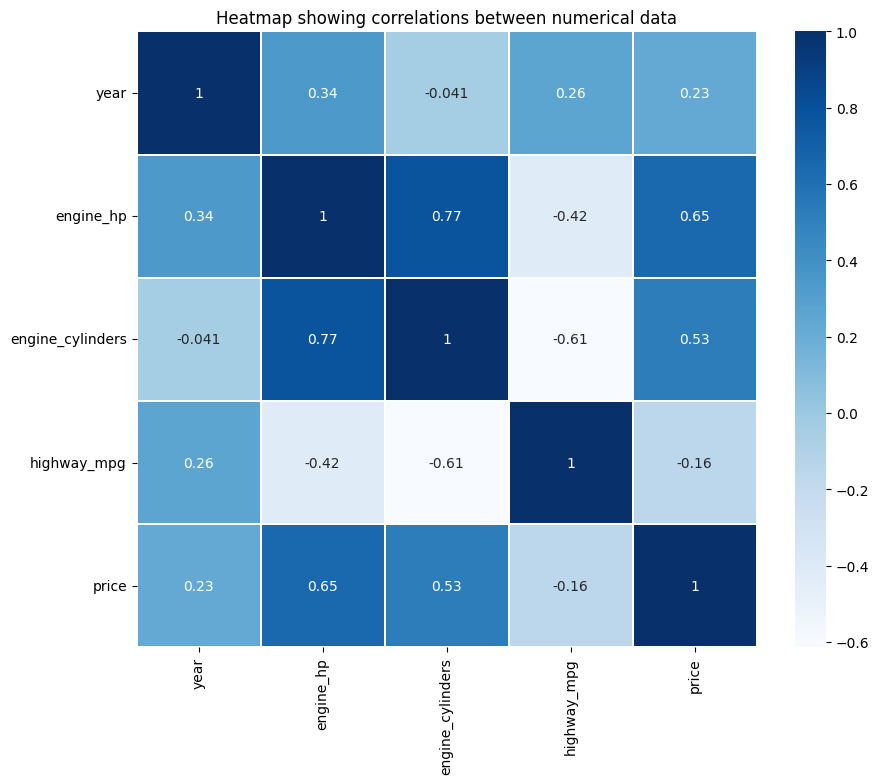

In [14]:
plt.figure(figsize=(10,8))  
sns.heatmap(data_numeric.corr(),annot=True,linewidths=.1, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [15]:
data_numeric.corr().unstack().sort_values(ascending = False)

year              year                1.000000
engine_hp         engine_hp           1.000000
price             price               1.000000
highway_mpg       highway_mpg         1.000000
engine_cylinders  engine_cylinders    1.000000
                  engine_hp           0.774851
engine_hp         engine_cylinders    0.774851
price             engine_hp           0.650095
engine_hp         price               0.650095
price             engine_cylinders    0.526274
engine_cylinders  price               0.526274
engine_hp         year                0.338714
year              engine_hp           0.338714
highway_mpg       year                0.258240
year              highway_mpg         0.258240
                  price               0.227590
price             year                0.227590
engine_cylinders  year               -0.040708
year              engine_cylinders   -0.040708
price             highway_mpg        -0.160043
highway_mpg       price              -0.160043
engine_hp    

In [16]:
print("engine_cylinders and engine_hp have the biggest correlation in the dataset")

engine_cylinders and engine_hp have the biggest correlation in the dataset


### Make `price` binary

In [17]:
data_class = data.copy()
price_mean = data_class['price'].mean()
data_class['above_average'] = np.where(data_class['price']>=price_mean,1,0)

In [18]:
data_class.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,34500,0


### Split the data

In [19]:
data_class.drop(columns=['price'], inplace=True)

In [20]:
df_train_full, df_test = train_test_split(data_class, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [22]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

### Question 3


- Calculate the mutual information score between `above_average` and other categorical variables in our dataset. Use the training set only.
- Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the lowest mutual information score?

In [23]:
def calculate_mi(series):
    return round(mutual_info_score(series, df_train.above_average),2)

In [24]:
df_train.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'above_average'],
      dtype='object')

In [25]:
data.select_dtypes(include=np.number).columns

Index(['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'price'], dtype='object')

In [26]:
cat = ['make', 'model', 'transmission_type', 'vehicle_style']

df_mi = df_train[cat].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi.sort_values('MI')

,MI
transmission_type,0.02
vehicle_style,0.08
make,0.24
model,0.46


In [27]:
print("transmission_type has the lowest mutual information score")

transmission_type has the lowest mutual information score


### Question 4

- Now let's train a logistic regression.
- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
- Fit the model on the training dataset.
        To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
        `model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)`
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.


In [28]:
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

In [29]:
df_test.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
dtype: object

In [31]:
train_dict = df_train.to_dict(orient='records')


dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

In [32]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict(X_val)

accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.95


### Question 5

- Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.


In [33]:
features = df_train.columns
features

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg'],
      dtype='object')

In [39]:
orig_score = accuracy

for c in features:
    subset = features.to_list().copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, orig_score - score, score)

make 0.024276122534620193 0.9257238774653798
model 0.033927822073017144 0.9160721779269828
year 0.0020352496852705793 0.9479647503147294
engine_hp 0.025954678976080503 0.9240453210239195
engine_cylinders 0.0062316407889214664 0.9437683592110785
transmission_type 0.005812001678556444 0.9441879983214435
vehicle_style 0.017142257658413707 0.9328577423415862
highway_mpg 0.02847251363827108 0.9215274863617289


In [41]:
print("smallest difference: year")

smallest difference: year


### Question 6

- For this question, we'll see how to use a linear regression model from Scikit-Learn.
- We'll need to use the original column `price`. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to `42`.
- This model also has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`.
- Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?

In [42]:
data['price']=np.log1p(data['price'])

In [43]:
df_train_full, df_test = train_test_split(data, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [44]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [46]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

In [48]:
del df_train['price']
del df_val['price']
del df_test['price']

In [49]:
train_dict = df_train.to_dict(orient='records')

In [50]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [51]:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    print(a, round(score, 4))

0 0.4895
0.01 0.4895
0.1 0.4895
1 0.4895
10 0.4898


In [52]:
print("alpha \033[1m0\033[0m leads to the best RMSE on the validation set")

alpha 0 leads to the best RMSE on the validation set
